# Step 1 - EDA - Marketing Funnel Datasets

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
%matplotlib inline

leads_df = pd.read_csv("data/adnu_marketing_qualified_leads_dataset.csv")
closed_leads_df = pd.read_csv("data/adnu_closed_deals_dataset.csv")

In [12]:
#helper function
def pichart_with_table(main_df,column_name,title,top_n,filename):
    fig = plt.figure(figsize=(10,6))

    summary = main_df.groupby(column_name)["mql_id"].nunique().sort_values(ascending=False)
    df = pd.DataFrame({'source':summary.index, 'counts':summary.values})
    labels = df['source']
    counts = df['counts']

    ax1 = fig.add_subplot(121)
    if top_n > 0:
        ax1.pie(counts[0:top_n], labels=labels[0:top_n], autopct='%1.1f%%', startangle=180)
    else:
        ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=180)
    ax1.set_title(title)
    ax1.axis('equal')

    ax2 = fig.add_subplot(122)
    font_size=10
    ax2.axis('off')
    if top_n > 0:
        df_table = ax2.table(cellText=df.values[0:top_n], colLabels=df.columns, loc='center',colWidths=[0.8,0.2])
    else:
        df_table = ax2.table(cellText=df.values, colLabels=df.columns, loc='center',colWidths=[0.8,0.2])

    df_table.auto_set_font_size(False)
    df_table.set_fontsize(font_size)

    fig.tight_layout()
    plt.savefig(filename)
    plt.show()


# Summaries

## 1) leads_df (marketing_qualified_leads_dataset) 

In [13]:
leads_df.describe(include="all")

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,f3296629e5e4964de099e204626f32fd,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


1. **8000** unique **MQL IDs**
2. **336** separate date instances which show **first contact date**
3. **495** unique **landing pages/sources** captured 
4. **10** unique points of **origin**

  ### Origin Analysis

Roughly **5.5k** is `online searches, social media and direct traffic` (70%), **12%** is `unknown` and rest are sources like `email,referrals`etc.

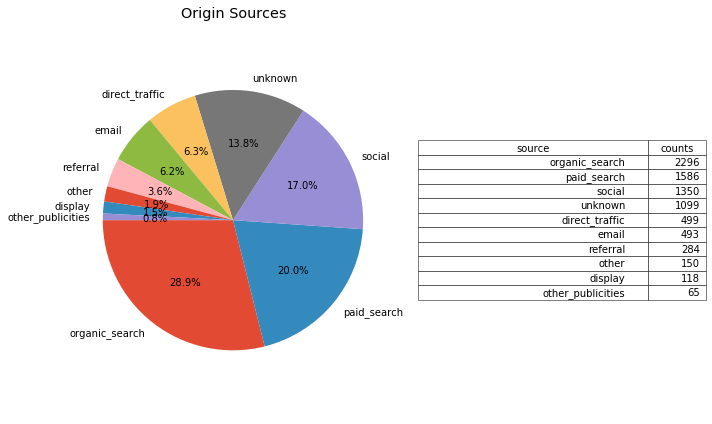

In [14]:
pichart_with_table(leads_df,"origin","Origin Sources",-1,"charts/origin_mql.png")

### First Contact Date Analysis
2018 data is much more (**3x, roughly ~6k**) in comparison to 2017 data (**~2k**).

            mql_id
year month        
2017 6      4     
     7      239   
     8      386   
     9      312   
     10     416   
     11     445   
     12     200   
2018 1      1141  
     2      1028  
     3      1174  
     4      1352  
     5      1303  


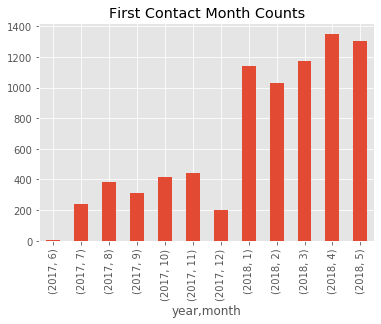

In [15]:
leads_df["first_contact_date"] = leads_df["first_contact_date"].astype("datetime64")
ldf = leads_df.groupby([leads_df["first_contact_date"].dt.year, leads_df["first_contact_date"].dt.month]).count()
ldf.index.names = ['year','month']
ldf = ldf.drop(['first_contact_date','landing_page_id','origin'], axis = 1) 
print(ldf)
ldf.plot(kind = "bar",legend = False)
plt.title("First Contact Month Counts")
plt.savefig('charts/first_contact_mql.png')
plt.show()


## 2) closed_leads_df (closed_deals_dataset) 

In [16]:
closed_leads_df.describe(include="all")

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
count,842,842,842,842,842,841,836,665,63,64,66,832,69.000000,8.420000e+02
unique,842,842,32,22,824,33,8,9,2,2,6,3,NaN,NaN
top,d8da124409cad437d5d2c35b101e3b91,f177c11663deb4c3c07af399b26f5110,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-04 03:00:00,home_decor,online_medium,cat,True,True,5-20,reseller,NaN,NaN
freq,1,1,140,133,6,105,332,407,58,54,22,587,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.028986,7.337768e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352.380558,1.744799e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.000000,0.000000e+00


1. **842** unique **MQL_IDs** showing 842 closed deals mapped to unique seller_ids (**1-1 mapping**)
2. **32** unique Sales Developement Representative **(SDR)** with the max one SDR converted was **140** sellers
3. **22** unique Sales Representatives **(SR)** with the max on SR related to **133** unique sellers.
4. **33** unique **business segments** with **home_decor** being the most closed segment (**105 leads**)
5. **8** unique **lead types** with **online_medium** being the most popular one (**332 leads**)
6. **9** unique **lead behaviour** profiles with **CAT** being most popular one (**407 leads**)
7. There is not much data for columns **has_company**, **has_gtin**, **average_stock** and **declared_product_catalog size**
8. **3** unique **business types** with **reseller** being the most popular one (**587 leads**)


### Business Segment Analysis

We see that some of the top converting segments are **home decor, health_beauty, car accessories, household utilities and construction tools.**

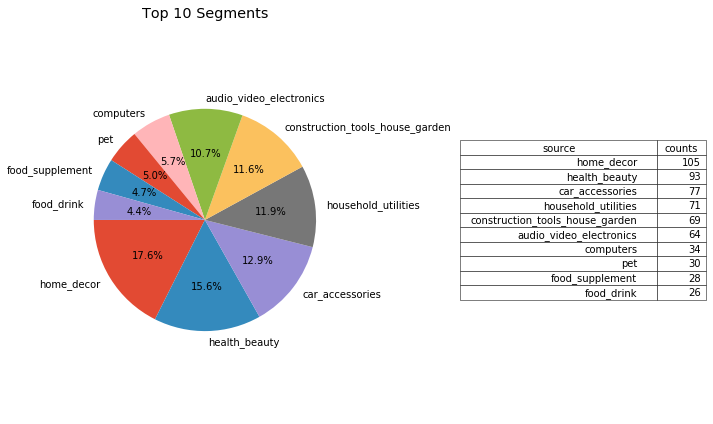

In [17]:
pichart_with_table(closed_leads_df,"business_segment","Top 10 Segments",10,'charts/business_segment_closed_deals.png')

### Business Type Analysis

Mostly its reseller and manufacturer

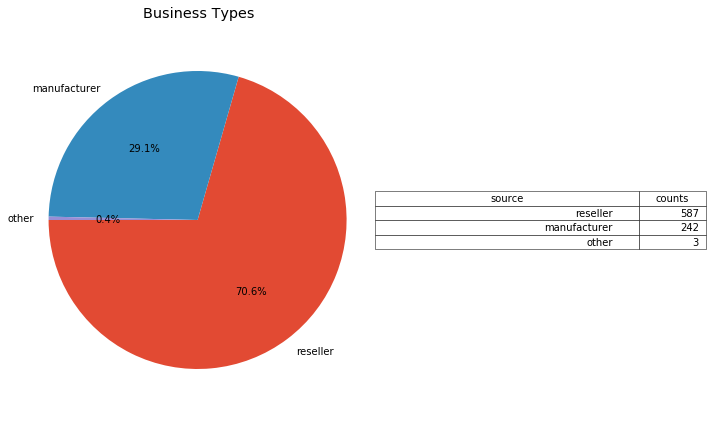

In [18]:
pichart_with_table(closed_leads_df,"business_type","Business Types",-1,'charts/business_type_closed_deals.png')

### Lead Type Analysis

Online being the dominating one **(~83%)** and offline and industry combined at **~17%**

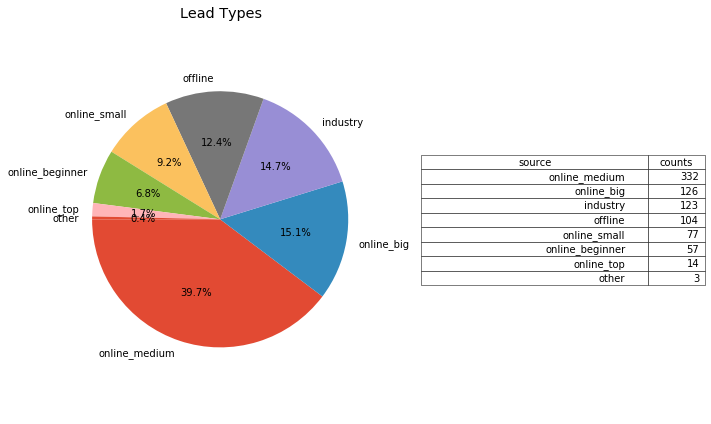

In [19]:
pichart_with_table(closed_leads_df,"lead_type","Lead Types",-1,'charts/lead_type_closed_deals.png')

### Lead Behaviour Analysis

**Cat, eagle, wolf, shark** seems to be the majority. Not sure what are the pairs (negligible counts)

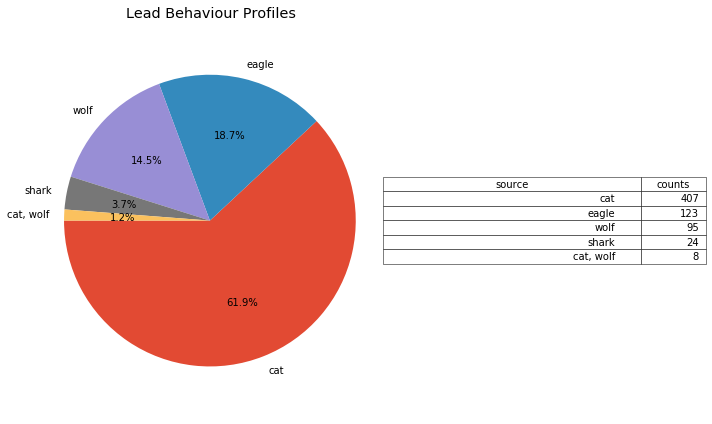

In [20]:
pichart_with_table(closed_leads_df,"lead_behaviour_profile","Lead Behaviour Profiles",5,'charts/lead_behaviour_closed_deals.png')

### SDR Analysis

Top 5 SDRs contribute to 50% of the closed deals

In [21]:
summary_sdr = closed_leads_df.groupby("sdr_id")["mql_id"].nunique().sort_values(ascending=False)
sdr_df = pd.DataFrame({'sdr_id':summary_sdr.index, 'counts':summary_sdr.values})
sdr_df["total_percentage_impact"] = round(sdr_df["counts"] / len(closed_leads_df),3) * 100
print(sdr_df[0:10])

                             sdr_id  counts  total_percentage_impact
0  4b339f9567d060bcea4f5136b9f5949e  140     16.6                   
1  068066e24f0c643eb1d089c7dd20cd73  81      9.6                    
2  56bf83c4bb35763a51c2baab501b4c67  74      8.8                    
3  9d12ef1a7eca3ec58c545c678af7869c  66      7.8                    
4  a8387c01a09e99ce014107505b92388c  59      7.0                    
5  9e4d1098a3b0f5da39b0bc48f9876645  55      6.5                    
6  de63de0d10a6012430098db33c679b0b  53      6.3                    
7  370c9f455f93a9a96cbe9bea48e70033  51      6.1                    
8  f42a2bd194f7802ab052a815c8de65b7  42      5.0                    
9  09285259593c61296eef10c734121d5b  42      5.0                    


### SR Analysis

Top 5 SRs contribute to 50% of closed deals as well

In [22]:
summary_sr = closed_leads_df.groupby("sr_id")["mql_id"].nunique().sort_values(ascending=False)
sr_df = pd.DataFrame({'sr_id':summary_sr.index, 'counts':summary_sr.values})
sr_df["total_percentage_impact"] = round(sr_df["counts"] / len(closed_leads_df),3) * 100
print(sr_df[0:10])

                              sr_id  counts  total_percentage_impact
0  4ef15afb4b2723d8f3d81e51ec7afefe  133     15.8                   
1  d3d1e91a157ea7f90548eef82f1955e3  82      9.7                    
2  6565aa9ce3178a5caf6171827af3a9ba  74      8.8                    
3  85fc447d336637ba1df43e793199fbc8  64      7.6                    
4  495d4e95a8cf8bbf8b432b612a2aa328  63      7.5                    
5  fbf4aef3f6915dc0c3c97d6812522f6a  59      7.0                    
6  2695de1affa7750089c0455f8ce27021  59      7.0                    
7  de63de0d10a6012430098db33c679b0b  53      6.3                    
8  9ae085775a198122c5586fa830ff7f2b  51      6.1                    
9  c638112b43f1d1b86dcabb0da720c901  36      4.3                    


### SDR <-> SR 

There is a many to many relation between SR and SDR. Let us see which pair works best together.

**Marketing process**
1. Get contacted by a Sales Development Representative (SDR), confirm some information and schedule a consultancy.
2. Consultancy is made by a Sales Representative (SR). The SR may close the deal (lead sign-up) or lose the deal (lead leaves without sign-in)



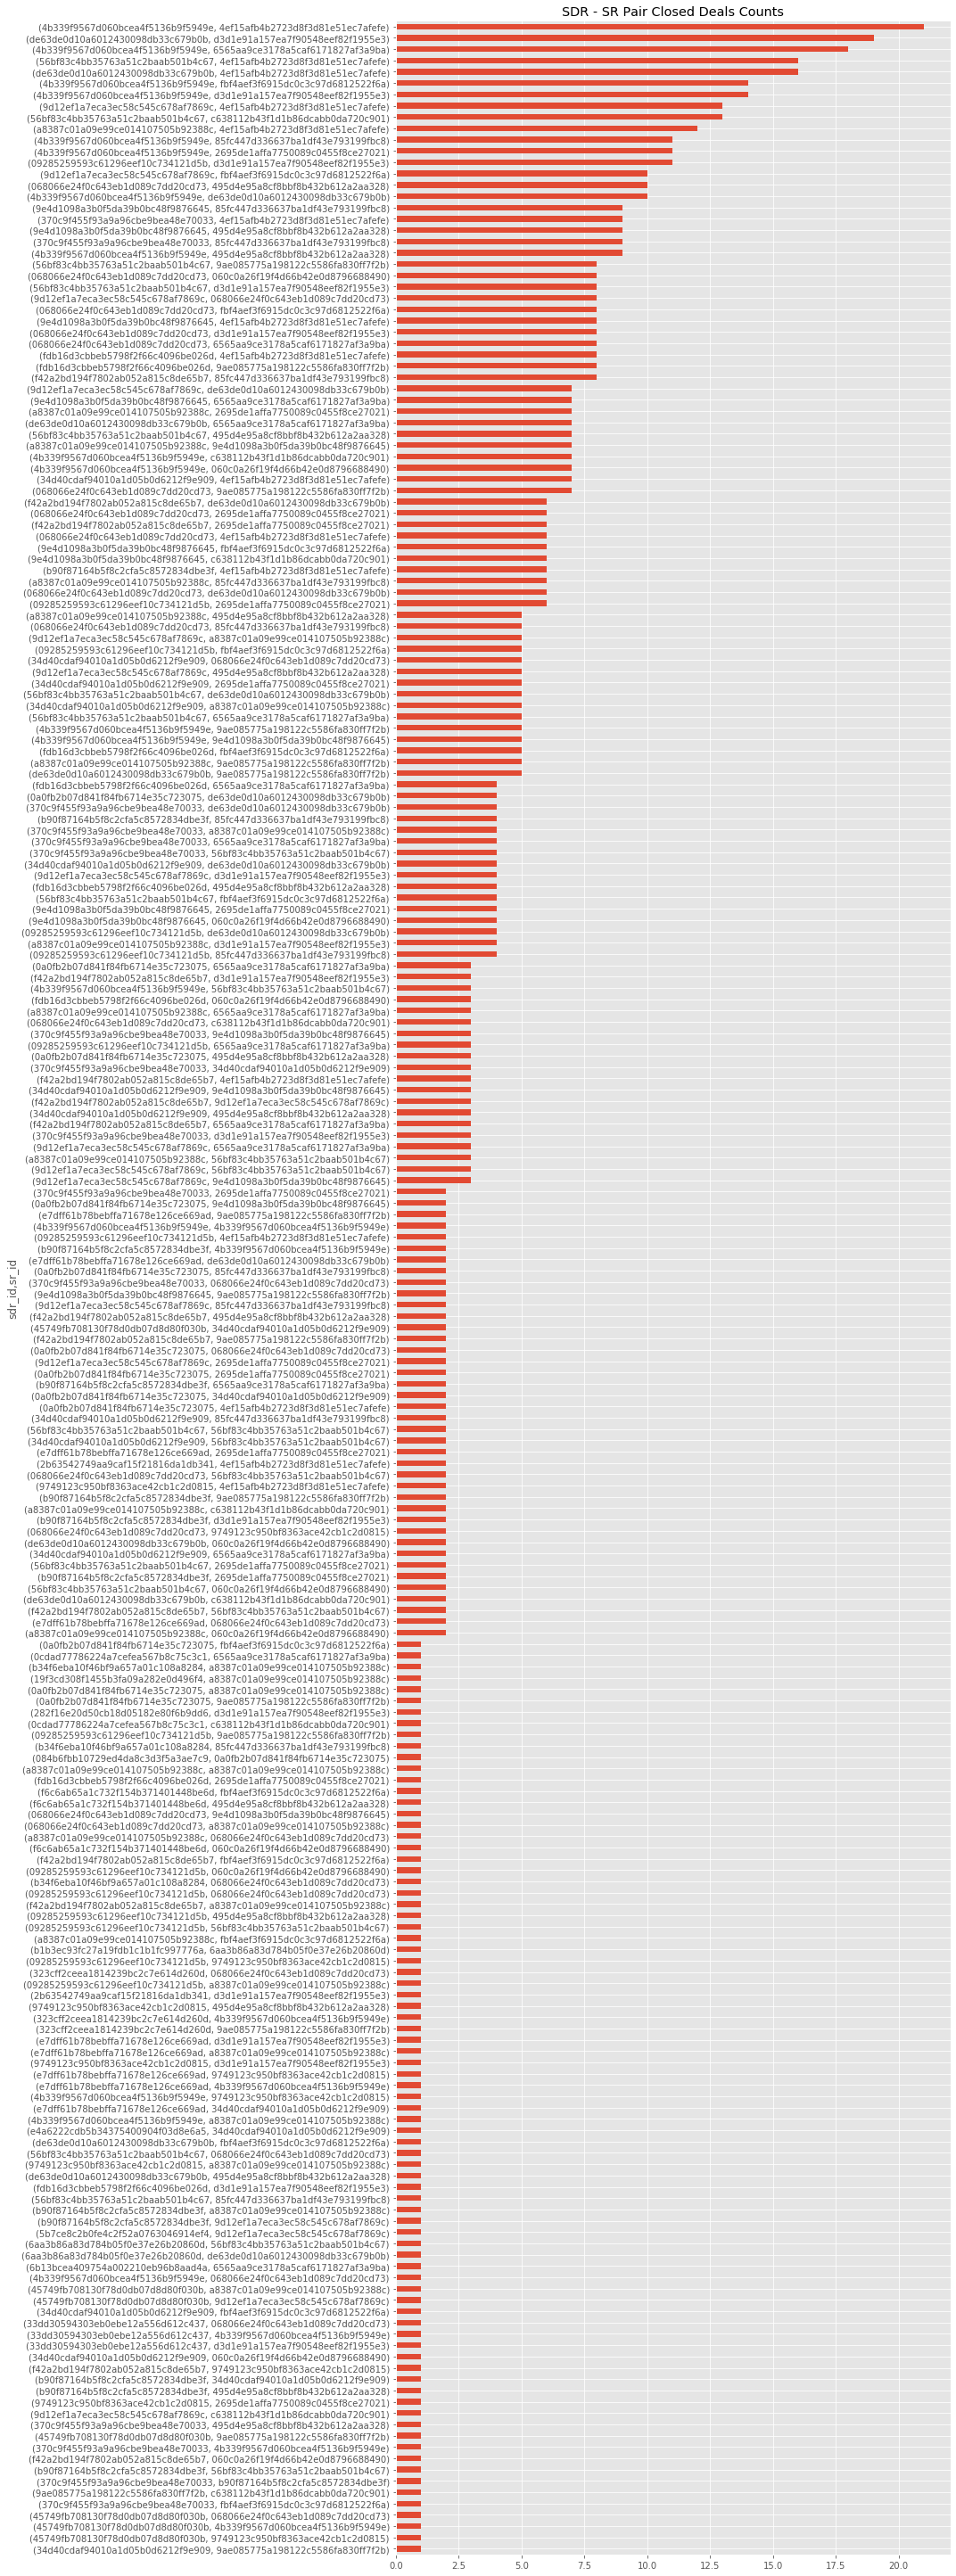

In [23]:

fig = plt.figure(figsize=(15,40))
combined_sr_sdr = closed_leads_df.groupby(["sdr_id","sr_id"]).size().sort_values(ascending=True)
combined_sr_sdr.plot(kind="barh")
fig.tight_layout()
plt.title("SDR - SR Pair Closed Deals Counts")
plt.savefig('charts/sdr_sr_mapping_count_closed_deals.png')
plt.show()


In [24]:
combined_sr_sdr

sdr_id                            sr_id                           
34d40cdaf94010a1d05b0d6212f9e909  9ae085775a198122c5586fa830ff7f2b    1 
45749fb708130f78d0db07d8d80f030b  9749123c950bf8363ace42cb1c2d0815    1 
                                  4b339f9567d060bcea4f5136b9f5949e    1 
                                  068066e24f0c643eb1d089c7dd20cd73    1 
370c9f455f93a9a96cbe9bea48e70033  fbf4aef3f6915dc0c3c97d6812522f6a    1 
                                                                     .. 
de63de0d10a6012430098db33c679b0b  4ef15afb4b2723d8f3d81e51ec7afefe    16
56bf83c4bb35763a51c2baab501b4c67  4ef15afb4b2723d8f3d81e51ec7afefe    16
4b339f9567d060bcea4f5136b9f5949e  6565aa9ce3178a5caf6171827af3a9ba    18
de63de0d10a6012430098db33c679b0b  d3d1e91a157ea7f90548eef82f1955e3    19
4b339f9567d060bcea4f5136b9f5949e  4ef15afb4b2723d8f3d81e51ec7afefe    21
Length: 224, dtype: int64

### Won Date Analysis

As we can see below the closed deal data starts from December 2017 and is at peak in April 2018.

            mql_id
year month        
2017 12     3     
2018 1      73    
     2      113   
     3      147   
     4      207   
     5      122   
     6      57    
     7      37    
     8      33    
     9      23    
     10     21    
     11     6     


<Figure size 1440x1440 with 0 Axes>

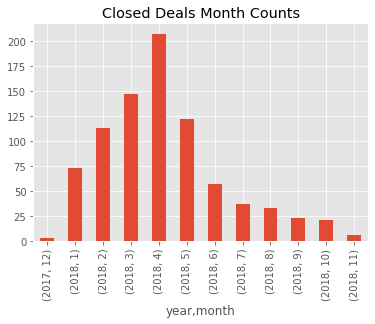

In [25]:
fig = plt.figure(figsize=(20,20))
closed_leads_df["won_date"] = closed_leads_df["won_date"].astype("datetime64")
ldf = closed_leads_df.groupby([closed_leads_df["won_date"].dt.year, closed_leads_df["won_date"].dt.month]).count()
ldf.index.names = ['year','month']
ldf.drop(ldf.iloc[:, 1:], inplace = True, axis = 1)
print(ldf)
ldf.plot(kind = "bar",legend = False)
fig.tight_layout()
plt.title("Closed Deals Month Counts")
plt.savefig('charts/won_date_closed_deals.png')
plt.show()


# Merge and Clean Datasets - MQL AND CLOSED DEALS

Marketing funnel data is an amalgamation of these two data sources (CSVs) which have mql_id as the common key.
![funnel schema](images/marketing_funnel_data_schema.PNG)

In [26]:
funnel_df = closed_leads_df.merge(leads_df, on="mql_id", how= "left")
funnel_df.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0,2018-01-14,22c29808c4f815213303f8933030604c,paid_search
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown


In [27]:
#Datetime cleaning and period counting
funnel_df.first_contact_date = pd.to_datetime(funnel_df.first_contact_date)
funnel_df.won_date = pd.to_datetime(funnel_df.won_date)
funnel_df["close_duration"] = funnel_df.won_date-funnel_df.first_contact_date

In [28]:
#Checking if close_duration is proper or not (won date cannot be before first contact)
print("Erroneous values: - ",funnel_df[funnel_df.close_duration.values/np.timedelta64(1, 'D')<0].shape[0])
funnel_df.loc[funnel_df.close_duration.values/np.timedelta64(1, 'D')<0,["mql_id","first_contact_date","won_date","close_duration"]]

Erroneous values: -  1


,mql_id,first_contact_date,won_date,close_duration
667,b91cf8812365f50ff4bda4bcd6206b05,2018-03-08,2018-03-06 19:38:55,-2 days +19:38:55


In [29]:
funnel_df.iloc[667]

mql_id                           b91cf8812365f50ff4bda4bcd6206b05
seller_id                        5e063e85d44b0f5c3e6ec3131103a57e
sdr_id                           a8387c01a09e99ce014107505b92388c
sr_id                            495d4e95a8cf8bbf8b432b612a2aa328
won_date                         2018-03-06 19:38:55             
business_segment                 health_beauty                   
lead_type                        online_big                      
lead_behaviour_profile           cat                             
has_company                      NaN                             
has_gtin                         NaN                             
average_stock                    NaN                             
business_type                    reseller                        
declared_product_catalog_size    NaN                             
declared_monthly_revenue         0                               
first_contact_date               2018-03-08 00:00:00             
landing_pa

In [30]:
#Removing the wrong value
funnel_df = funnel_df.drop(667)

In [31]:
#count missing values (NAs)
missing_count = pd.DataFrame(funnel_df.isna().sum(),columns=['Number'])
missing_count['Percentage'] = round(missing_count / len(funnel_df),2) * 100
missing_count

,Number,Percentage
mql_id,0,0.0
seller_id,0,0.0
sdr_id,0,0.0
sr_id,0,0.0
won_date,0,0.0
business_segment,1,0.0
lead_type,6,1.0
lead_behaviour_profile,177,21.0
has_company,778,93.0
has_gtin,777,92.0


In [32]:
#Dropping columns has_company,has_gtin,average_stock,declared_product_catalog_size as they have substantial missing values (>90%)
funnel_df = funnel_df.drop(['has_company','has_gtin','average_stock','declared_product_catalog_size'], axis = 1) 

#filling the rest NAs
rest_cols = ['lead_behaviour_profile','origin','business_segment','lead_type','business_type']
funnel_df[rest_cols] = funnel_df[rest_cols].fillna('unknown')

#checking if any null is remaining or not
funnel_df[funnel_df.isnull().any(axis=1)]

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,first_contact_date,landing_page_id,origin,close_duration


In [33]:
#writing the csv for further use
funnel_df.to_csv("output/cleaned_marketing_funnel.csv",index=False)

## MERGED AND CLEANED MARKETING FUNNEL ANALYSIS

In [34]:
funnel_df.describe(include="all")

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,first_contact_date,landing_page_id,origin,close_duration
count,841,841,841,841,841,841,841,841,841,8.410000e+02,841,841,841,841
unique,841,841,32,22,823,34,9,10,4,NaN,195,134,10,NaN
top,d8da124409cad437d5d2c35b101e3b91,f177c11663deb4c3c07af399b26f5110,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-04 03:00:00,home_decor,online_medium,cat,reseller,NaN,2018-02-06 00:00:00,22c29808c4f815213303f8933030604c,organic_search,NaN
freq,1,1,140,133,6,105,332,406,586,NaN,14,174,270,NaN
first,NaN,NaN,NaN,NaN,2017-12-05 02:00:00,NaN,NaN,NaN,NaN,NaN,2017-07-11 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2018-11-14 18:04:19,NaN,NaN,NaN,NaN,NaN,2018-05-31 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.346493e+04,NaN,NaN,NaN,49 days 03:51:12.171224
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.745836e+06,NaN,NaN,NaN,75 days 08:38:01.457963
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0 days 02:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,5 days 20:38:20


### Close Duration Analysis

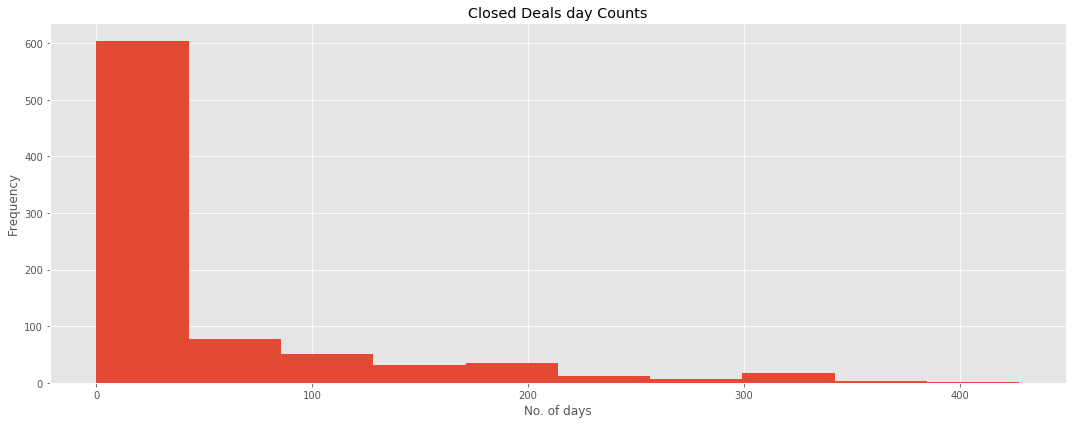

In [35]:
#Days taken to close deals
fig = plt.figure(figsize=(15,6))
(funnel_df['close_duration'].astype('timedelta64[h]') / 24).plot.hist()
plt.title("Closed Deals day Counts")
plt.xlabel("No. of days")
fig.tight_layout()
plt.savefig('charts/duration_days_closed_deals.png')
plt.show()


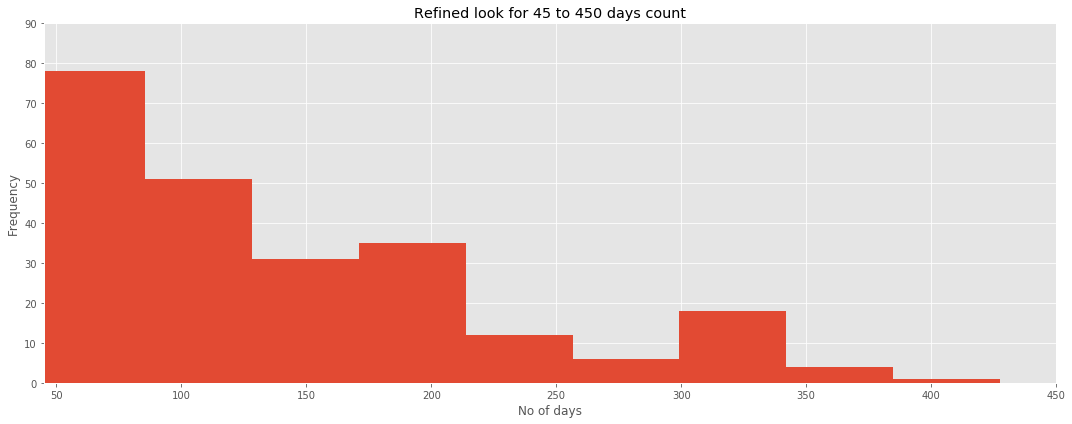

In [36]:
fig = plt.figure(figsize=(15,6))
(funnel_df['close_duration'].astype('timedelta64[h]') / 24).plot.hist()

plt.title("Refined look for 45 to 450 days count")
plt.xlabel("No of days")
plt.xlim(45,450)
plt.ylim(0,90)
fig.tight_layout()
plt.savefig('charts/duration_45to450days_closed_deals.png')
plt.show()


### Landing Page Analysis

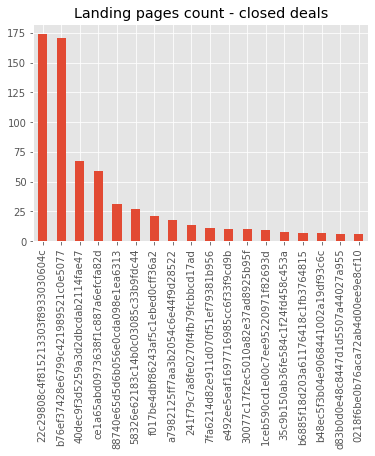

NameError: name 'pl' is not defined

In [57]:

fdf = funnel_df.landing_page_id.value_counts()
fdf[fdf.values > 5].plot(kind="bar")
plt.title("Landing pages count - closed deals")
plt.savefig("charts/landing_page_counts.png")
plt.show()


### Top SR, SDR Analysis

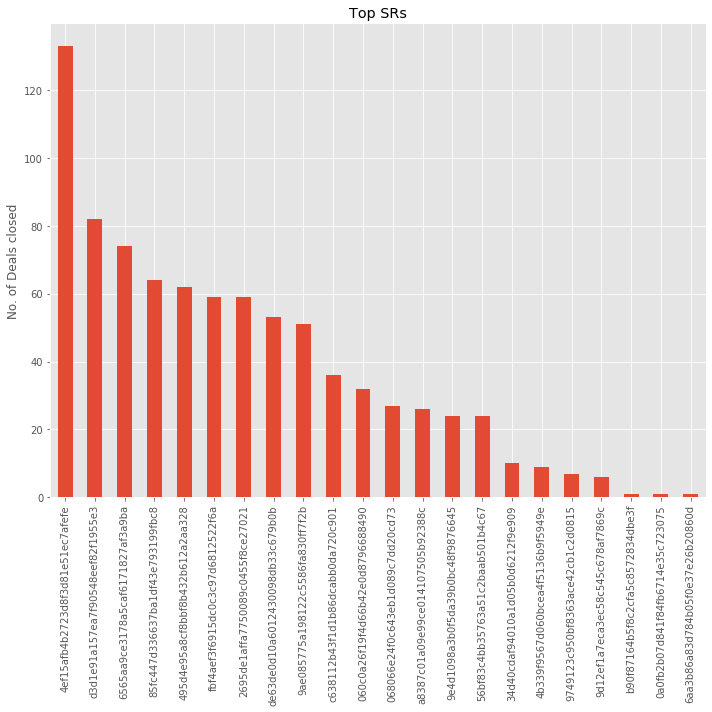

In [38]:
fig = plt.figure(figsize=(10,10))
funnel_df.sr_id.value_counts().plot.bar()
plt.title("Top SRs")
plt.ylabel("No. of Deals closed")
fig.tight_layout()
plt.savefig('charts/top_sr.png')
plt.show()

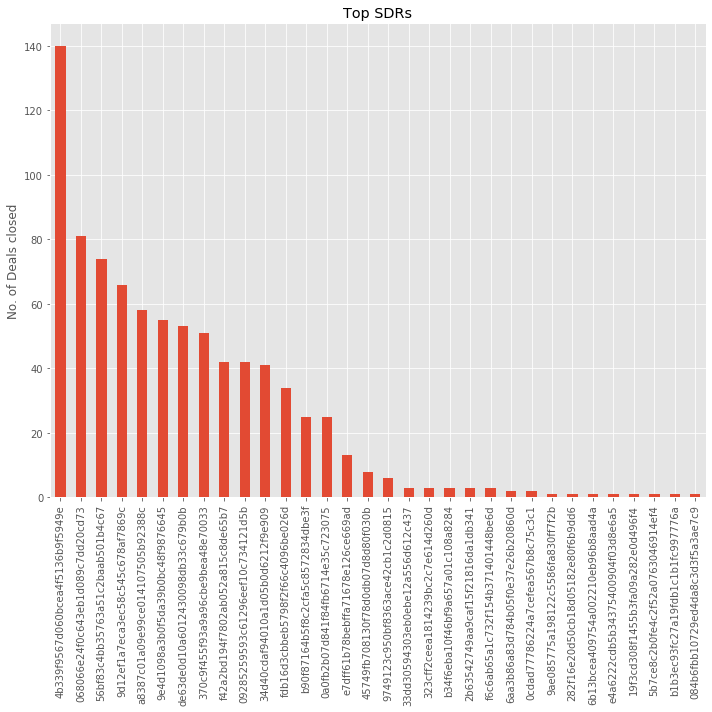

In [39]:
fig = plt.figure(figsize=(10,10))
funnel_df.sdr_id.value_counts().plot.bar()
plt.title("Top SDRs")
plt.ylabel("No. of Deals closed")
fig.tight_layout()
plt.savefig('charts/top_sdr.png')
plt.show()

In [40]:
funnel_df.sr_id.value_counts()

4ef15afb4b2723d8f3d81e51ec7afefe    133
d3d1e91a157ea7f90548eef82f1955e3    82 
6565aa9ce3178a5caf6171827af3a9ba    74 
85fc447d336637ba1df43e793199fbc8    64 
495d4e95a8cf8bbf8b432b612a2aa328    62 
fbf4aef3f6915dc0c3c97d6812522f6a    59 
2695de1affa7750089c0455f8ce27021    59 
de63de0d10a6012430098db33c679b0b    53 
9ae085775a198122c5586fa830ff7f2b    51 
c638112b43f1d1b86dcabb0da720c901    36 
060c0a26f19f4d66b42e0d8796688490    32 
068066e24f0c643eb1d089c7dd20cd73    27 
a8387c01a09e99ce014107505b92388c    26 
9e4d1098a3b0f5da39b0bc48f9876645    24 
56bf83c4bb35763a51c2baab501b4c67    24 
34d40cdaf94010a1d05b0d6212f9e909    10 
4b339f9567d060bcea4f5136b9f5949e    9  
9749123c950bf8363ace42cb1c2d0815    7  
9d12ef1a7eca3ec58c545c678af7869c    6  
b90f87164b5f8c2cfa5c8572834dbe3f    1  
0a0fb2b07d841f84fb6714e35c723075    1  
6aa3b86a83d784b05f0e37e26b20860d    1  
Name: sr_id, dtype: int64

### Revenue Disclosed Analysis

45
5.35077288941736


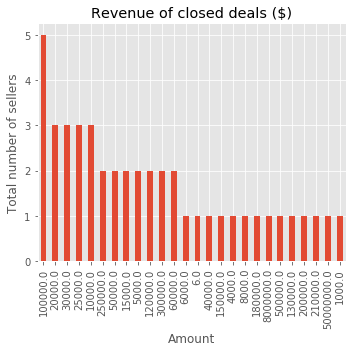

In [41]:
fig = plt.figure(figsize=(5,5))

print(len(funnel_df[funnel_df.declared_monthly_revenue>0])) #total count
print(len(funnel_df[funnel_df.declared_monthly_revenue>0])/len(funnel_df)*100) #total percent of data
funnel_df[funnel_df.declared_monthly_revenue>0].declared_monthly_revenue.value_counts().plot.bar()
plt.title("Revenue of closed deals ($)")
plt.xlabel("Amount")
plt.ylabel("Total number of sellers")
fig.tight_layout()
plt.savefig("charts/revenue_disclosed.png")
plt.show()

### Origin Analysis Closed Deals

In [ ]:
pichart_with_table(funnel_df,"origin","Origin Sources",-1,"charts/origin_closed.png")